# Análise Exploratória de Dados (AED)

Neste documento é abordada a AED do conjunto de dados *Credit Risk Analysis for extending Bank Loans*, obtido no Kaggle (disponível clicando [aqui](https://www.kaggle.com/datasets/atulmittal199174/credit-risk-analysis-for-extending-bank-loans)):


Coluna | Conteúdo
----|----
age | Idade dos clientes
ed | Nível de educação dos clientes
employ | Experiência de emprego do cliente
address | Endereço do cliente
income | Salário anual do cliente
debtinc | Relação débito e salário do cliente 
creddebt | Relação crédito e débito do cliente
othdebt | Outros débitos
default | Cliente não pagou suas dívidas anteriormente


Logo abaixo, tem-se os resultados desta análise e mais adiante também é abordado o passo a passo da análise feita (código).



## Resultados

### Informações Técnicas

- **Número total de entradas:** 1150 linhas
- **Número total de características:** 09 colunas


- **variáveis categóricas:** ed, employ, address e default
- **variáveis contínuas:** age, income, debtinc, creddebt e othdebt


- **Dados nulos:** apenas na feature 'default', com 700 linhas não nulas de 1150 linhas totais
- **Formato dos dados:** todos os formatos estão ok


- **Anomalias:** foram encontradas algumas anomalias na variável 'income'


- **Correlações:** 
    - Com relação à feature 'default', as demais variáveis, no geral, não apresentaram correlação alta:
        - **Maior correlação:** 0.389575 (debtinc)
        - **Menor correlação:** 0.070970 (income)
        
    - Com relação à feature 'income' (excluindo as features de crédito por renda, débito por renda e outros débitos):
        - **Maior correlação:** 0.630706 (employ)
        - **Menor correlação:** 0.070970 (default)
        
- Distribuição das features target:
    - default: desbalanceada (74/26)
    - income: contém anomalia
  

### Informações descritivas


- **default (categórica) - desbalanceada:**
    - 517 valores para 0 (73.86%)
    - 183 valores para 1 (26.14%)


- **income (contínua): - contém anomalias**
    - Mínimo: 13.00
    - Máximo: 446.00
    - Média: 47.98
    - Mediana: 36.00
    - Desvio: 40.51  
    

- **Idade:** 
    - Mínimo: 20.000000
    - Máximo: 56.000000
    - Média: 35.235652
    - Mediana: 35.000000
    - Desvio: 8.089961

### Conclusões

Pode-se criar modelos preditivos com duas targets:
- default (exige balanceamento e tratamento dos dados nulos)
- income (exige tratamento dos dados nulos de 'default')

## Código da análise

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as df_img


sns.set_style('whitegrid')

In [87]:
# Criando o data frame e o conhecendo brevemente
df = pd.read_csv('../Dados/bankloans.csv')

display(df.head())

df_img.export(df.head(), '../Imagens/df_head')

df.info()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


[0327/112753.371541:ERROR:sandbox_linux.cc(377)] InitializeSandbox() called with multiple threads in process gpu-process.
[0327/112753.544183:WARNING:bluez_dbus_manager.cc(248)] Floss manager not present, cannot set Floss enable/disable.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1150 non-null   int64  
 1   ed        1150 non-null   int64  
 2   employ    1150 non-null   int64  
 3   address   1150 non-null   int64  
 4   income    1150 non-null   int64  
 5   debtinc   1150 non-null   float64
 6   creddebt  1150 non-null   float64
 7   othdebt   1150 non-null   float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 81.0 KB


[0327/112753.755340:INFO:headless_shell.cc(659)] Written to file /tmp/tmpqvrq8tsp/temp.png.


In [11]:
# Conhecendo as correlações (em módulo)
df.corr()['default'].apply(lambda x:x if x>=0 else -x).sort_values(ascending=False).to_frame()

,default
default,1.000000
debtinc,0.389575
employ,0.282978
creddebt,0.244740
address,0.164451
othdebt,0.145713
age,0.137657
ed,0.114676
income,0.070970


In [13]:
df.drop(columns={'othdebt', 'creddebt', 'debtinc'}).corr()['income'].apply(lambda x:x if x>=0 else -x).sort_values(ascending=False).to_frame()

,income
income,1.000000
employ,0.630706
age,0.473617
address,0.299643
ed,0.201183
default,0.070970


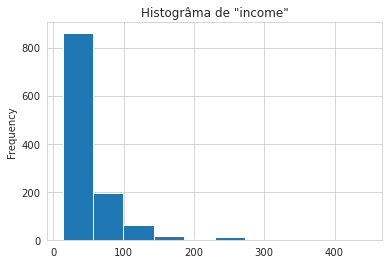

In [84]:
# Análise gráfica da distribuição de Income
df['income'].plot(kind='hist',
                 title='Histogrâma de "income"')

plt.savefig('../Imagens/income-hist')


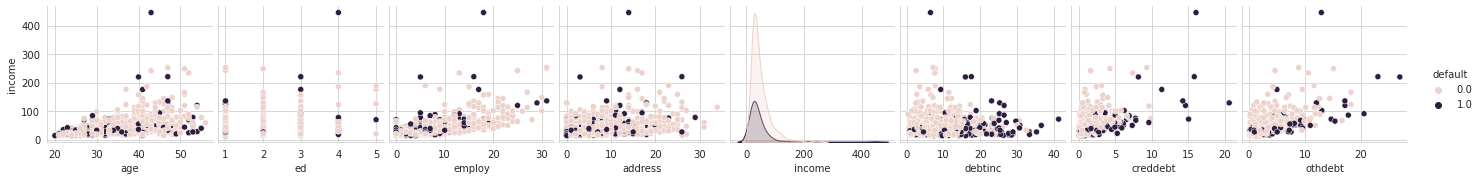

In [21]:
# Analisando distribuição income em função de cada coluna (categorizado com relação a default)
sns.pairplot(df, y_vars=['income'], hue='default')

In [35]:
# Análisando distribuição da variável categórica 'default' - tabela
pd.concat([df['default'].value_counts().to_frame(), df['default'].value_counts(normalize=True).to_frame()], axis=1)

,default,default
0.0,517,0.738571
1.0,183,0.261429


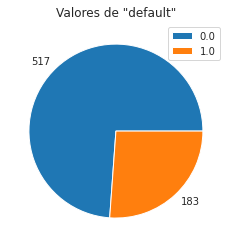

In [83]:
# Análisando distribuição da variável categórica 'default' - gráfico
x = df['default'].value_counts().to_list()
valores = df['default'].value_counts().index.to_list()

plt.pie(x=x, labels=x)
plt.title('Valores de "default"')
plt.legend(valores)
plt.savefig('../Imagens/default-pie-plot')
plt.show()

In [38]:
# Análise descritiva - Income
display(df.describe()['income'].to_frame())
df_img.export(df.describe()['income'].to_frame(), '../Imagens/describe_income')

,income
count,1150.000000
mean,47.982609
std,40.508814
min,13.000000
25%,24.000000
50%,36.000000
75%,56.750000
max,446.000000


[0327/103134.549444:ERROR:sandbox_linux.cc(377)] InitializeSandbox() called with multiple threads in process gpu-process.
[0327/103134.711708:WARNING:bluez_dbus_manager.cc(248)] Floss manager not present, cannot set Floss enable/disable.
[0327/103134.894284:INFO:headless_shell.cc(659)] Written to file /tmp/tmp38v12ow5/temp.png.


In [39]:
# Análise descritiva - Age
display(df.describe()['age'].to_frame())
df_img.export(df.describe()['age'].to_frame(), '../Imagens/describe_age')

,age
count,1150.000000
mean,35.235652
std,8.089961
min,20.000000
25%,29.000000
50%,35.000000
75%,41.000000
max,56.000000


[0327/103136.120061:ERROR:sandbox_linux.cc(377)] InitializeSandbox() called with multiple threads in process gpu-process.
[0327/103136.297821:WARNING:bluez_dbus_manager.cc(248)] Floss manager not present, cannot set Floss enable/disable.
[0327/103136.465562:INFO:headless_shell.cc(659)] Written to file /tmp/tmpwku8gej7/temp.png.
